# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Alessandra Blücher </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [6]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [7]:
df['Hemisfério']=0
df.loc[(df.Latitude > 0),"Hemisfério"] = "Norte"
df.loc[(df.Latitude < 0),"Hemisfério"] = "Sul"

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

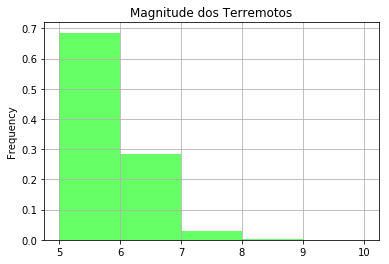

In [85]:
df.Magnitude.describe()

faixa = np.arange(5,11,1)
plot = df.Magnitude.plot.hist(bins = faixa, title = 'Magnitude dos Terremotos', normed = 1, alpha=0.6, color = 'lime')
plt.grid()

Observando o histograma acima é possível inferir que a grande maioria dos terremotos (quase 70%) encontra-se entre 5 e 6 pontos da escala Richter, enquanto terremotos de magnitude acimda de 7 são raros (abaixo de 10%).

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [25]:
print(df.Magnitude.describe())
scale = 5.882531
loc = 0
T = expon.rvs(loc,scale,len(df.Magnitude))

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

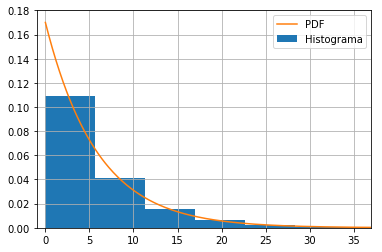

In [37]:
plt.hist(T, normed = True)
a = np.arange(T.min(),T.max(),0.1)
plt.plot(a,expon.pdf(a, loc, scale))
plt.axis([-1,37,0,0.18])
plt.legend(['PDF', 'Histograma'])
plt.grid(True)
plt.show()

Observando o fdp simultaneamente com o histograma é possível concluir que a densidade da probabilidade está diretamente relacionada com a probabilidade. 

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [45]:
cruzada = pd.crosstab(df.Hemisfério, df.Type, margins = True, normalize=True)*100
cruzada

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
0,0.004271,0.000000,0.000000,0.000000,0.004271
Norte,44.712113,0.008543,0.627883,0.000000,45.348539
Sul,54.514779,0.008543,0.119597,0.004271,54.647189
All,99.231164,0.017085,0.747480,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [47]:
print("44.712113")

44.712113


Explique o seu raciocínio

A necessidade de realizar o calculo foi eliminada pela tabela e a função normalize. Além disso, supus terremoto como somente terremotos naturais

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é 13.845%

In [53]:
espaco_amostral_norte = 45.348539
explosao_nuclear_norte = 0.627883

probabilidade = explosao_nuclear_norte/espaco_amostral_norte
print(probabilidade)

0.013845716176214629


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

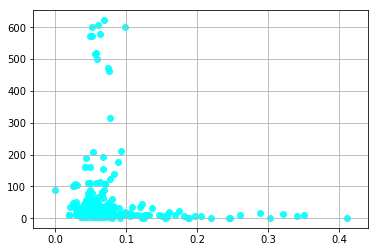

In [84]:
plt.scatter(df["Magnitude Error"], df.Depth, c = 'aqua', alpha = 0.9)
plt.grid(True)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [69]:
DF = df.dropna(subset=['Magnitude Error','Depth'])
correlacao = np.corrcoef(DF["Magnitude Error"],DF.Depth)[0,1]

print(correlacao)

-0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

A correlação calculada(-0.07) mostrou a ausência de relação linear entre as variáveis devido a sua proximidade do 0. 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [72]:
print(df.Latitude.describe())

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


Em ordem: Valores recolhidos, média, desvio-padrão, valor mínimo, disposição dos valores limite para 25%, disposição dos valores limite para 50%, disposição dos valores limite para 75%, valor máximo.

In [74]:
print(df.Longitude.describe())

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


Em ordem: Valores recolhidos, média, desvio-padrão, valor mínimo, disposição dos valores limite para 25%, disposição dos valores limite para 50%, disposição dos valores limite para 75%, valor máximo.

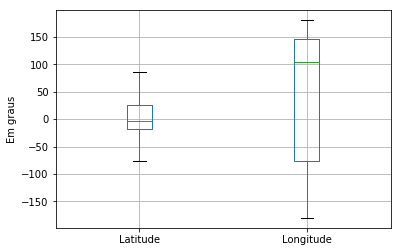

In [79]:
plot = df.boxplot(column=['Latitude','Longitude'], figsize=(8,8))
plt.ylabel("Em graus")

O boxplot é uma representação visual que permite compreender a distribuição dos dados de forma mais clara. A linha azul inferior ao box representa o limite para os 25% menores valores, e a superior o limite para os 25% maiores. O box em si representa o restante 50%, com a linha verde delimitando onde a metade exata se encontra.


## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [82]:
newdata = df[df["Magnitude Type"] == "MB"]
newerdata = newdata[newdata.Type == "Nuclear Explosion"]

resposta = (newerdata.Hemisfério.value_counts(sort = False, normalize = True)*100).round(decimals=3)
resposta

Sul      17.178
Norte    82.822
Name: Hemisfério, dtype: float64

É mais provável que tenha sido no Norte.